## Analiza Danych

Aby ocenić opłacalność paneli fotowoltaicznych na podstawie Twojej ramki danych, najpierw warto zrozumieć, jakie informacje zawiera. Spójrzmy na dane, aby zobaczyć, co mamy do dyspozycji i jak możemy na tej podstawie analizować opłacalność instalacji fotowoltaicznych.

Co do wzoru na produkcję energii z paneli fotowoltaicznych, istnieje kilka podstawowych czynników wpływających na ilość generowanej energii, takich jak moc zainstalowana (w kWp), nasłonecznienie (w kWh/m²), efektywność paneli oraz liczba godzin słonecznych. Zazwyczaj wydajność instalacji fotowoltaicznej wyraża się wzorem:


E=P×H×PR
gdzie:

E jest wyprodukowaną energią elektryczną w kWh,

P oznacza moc zainstalowaną w kWp,

H jest średnim rocznym nasłonecznieniem na jednostkę powierzchni (w kWh/m²),

PR to współczynnik wydajności (Performance Ratio), który uwzględnia straty systemowe i realne warunki pracy (zwykle w przedziale 0,75 do 0,85).

Z Twoich danych wynika, że zawierają one informacje o temperaturze, uczuciu temperatury, minimalnej i maksymalnej temperaturze, ciśnieniu, wilgotności, prędkości wiatru, zachmurzeniu i głównych warunkach pogodowych dla różnych miast i dni. Kluczowe kolumny to:

date: data pomiaru,
city_name: nazwa miasta,
temp: średnia temperatura,
feels_like: temperatura odczuwalna,
temp_min i temp_max: minimalna i maksymalna temperatura,
pressure: ciśnienie,
humidity: wilgotność,
wind_speed: prędkość wiatru,
clouds_all: poziom zachmurzenia,
weather_main: główne warunki pogodowe.

Aby analizować opłacalność paneli fotowoltaicznych, przydałaby się informacja o nasłonecznieniu, które jest kluczowe do obliczenia potencjalnej produkcji energii. W Twojej ramce danych nie ma bezpośrednich informacji o nasłonecznieniu ani o mocy zainstalowanych paneli fotowoltaicznyc

**Oszacowanie nasłonecznienia**
Clouds_all: Kolumna ta pokazuje stopień zachmurzenia w procentach. Można przyjąć, że dni z mniejszym zachmurzeniem (np. poniżej 20-30%) są bardziej nasłonecznione.
Weather_main: Ta kolumna wskazuje główne warunki pogodowe, takie jak "Clear", "Clouds", "Rain", itp. Dni z "Clear" można uznać za pełne nasłonecznienie, podczas gdy "Clouds" mogą być traktowane jako częściowo nasłonecznione w zależności od stopnia zachmurzenia.

**Wpływ temperatury**
Temperatura, zwłaszcza temp_max, może mieć wpływ na efektywność paneli fotowoltaicznych. Zwykle panele fotowoltaiczne są najbardziej efektywne w umiarkowanych temperaturach, a ich wydajność spada zarówno w bardzo wysokich, jak i bardzo niskich temperaturach. Można uwzględnić temperaturę w analizie, choć jej wpływ na ogólną wydajność paneli jest mniej bezpośredni niż nasłonecznienie.

**Proponowane obliczenia**
Mogę pomóc stworzyć prosty model oszacowania dni nasłonecznionych na podstawie danych clouds_all i weather_main, a następnie użyć tego oszacowania, by przybliżyć potencjalną produkcję energii, jeśli podasz przykładową moc zainstalowaną dla paneli. Czy chciałbyś, żebym przeprowadził taką analizę na Twoich danych? Jeśli tak, proszę podaj moc zainstalowaną, którą chciałbyś użyć w obliczeniach.

In [31]:
import pandas as pd
from sqlalchemy import create_engine, text

In [32]:
# Wczytanie danych z bazy danych.

# Ścieżka do pliku bazy danych SQLite
sqlite_db_path = r'../5. Baza_Danych/projekt_fotowoltaika_2024.db'

In [33]:
# Tworzenie połączenia z bazą danych
engine = create_engine(f'sqlite:///{sqlite_db_path}')

In [34]:
# Zapytanie o listę tabel w bazie danych
with engine.connect() as con:
    tables_list = con.execute(text("SELECT name FROM sqlite_master WHERE type='table';")).fetchall()
    print('Lista tabel:', tables_list)

Lista tabel: [('projekt_fotowoltaika_2024',)]


In [35]:
# Wczytanie danych do DataFrame.
with engine.connect() as con:
    query = text("SELECT * FROM projekt_fotowoltaika_2024;")
    df_weather_db = pd.read_sql(query, con)

In [36]:
df_weather_db.head()

,Unnamed: 0,date,city_name,lat,lon,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,0,1979-01-01,Baden_Baden,48.765640,8.228524,-10.442083,-16.532917,-16.18,3.02,1013.666667,81.916667,3.681667,100,Snow
1,1,1979-01-01,Bozanska,54.473028,18.302179,-14.100000,-20.617500,-19.14,-9.46,1002.416667,82.000000,6.157917,100,Snow
2,2,1979-01-01,Walcz_Drugi,53.257039,16.521203,-16.437083,-23.322500,-21.26,-9.57,1003.708333,82.416667,3.682083,100,Clouds
3,3,1979-01-02,Baden_Baden,48.765640,8.228524,-8.856667,-14.874167,-15.82,-3.96,1024.250000,84.208333,4.524583,100,Snow
4,4,1979-01-02,Bozanska,54.473028,18.302179,-9.037917,-15.179167,-14.14,-7.40,1004.791667,85.375000,4.449583,100,Clouds


In [37]:
# Usunięcie kolumny 'Unnamed: 0'
df_weather_db.drop(columns=['Unnamed: 0'], inplace=True)

In [38]:
df_weather_db.head()

,date,city_name,lat,lon,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,1979-01-01,Baden_Baden,48.765640,8.228524,-10.442083,-16.532917,-16.18,3.02,1013.666667,81.916667,3.681667,100,Snow
1,1979-01-01,Bozanska,54.473028,18.302179,-14.100000,-20.617500,-19.14,-9.46,1002.416667,82.000000,6.157917,100,Snow
2,1979-01-01,Walcz_Drugi,53.257039,16.521203,-16.437083,-23.322500,-21.26,-9.57,1003.708333,82.416667,3.682083,100,Clouds
3,1979-01-02,Baden_Baden,48.765640,8.228524,-8.856667,-14.874167,-15.82,-3.96,1024.250000,84.208333,4.524583,100,Snow
4,1979-01-02,Bozanska,54.473028,18.302179,-9.037917,-15.179167,-14.14,-7.40,1004.791667,85.375000,4.449583,100,Clouds


In [39]:
# Informacje o kolumnach i typach danych
df_weather_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49308 entries, 0 to 49307
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          49308 non-null  object 
 1   city_name     49308 non-null  object 
 2   lat           49308 non-null  float64
 3   lon           49308 non-null  float64
 4   temp          49308 non-null  float64
 5   feels_like    49308 non-null  float64
 6   temp_min      49308 non-null  float64
 7   temp_max      49308 non-null  float64
 8   pressure      49308 non-null  float64
 9   humidity      49308 non-null  float64
 10  wind_speed    49308 non-null  float64
 11  clouds_all    49308 non-null  int64  
 12  weather_main  49308 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 4.9+ MB


In [40]:
# Podstawowe statystyki opisowe
df_weather_db.describe()

,lat,lon,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all
count,49308.000000,49308.000000,49308.000000,49308.000000,49308.000000,49308.000000,49308.000000,49308.000000,49308.000000,49308.000000
mean,52.165236,14.350635,8.896254,6.982085,4.408741,13.084188,1015.635358,80.171957,3.726556,88.244504
std,2.454625,4.389665,7.747658,9.282311,7.069529,8.937748,9.251157,11.037107,1.755812,24.010742
min,48.765640,8.228524,-22.734583,-29.682083,-30.120000,-19.150000,967.875000,33.125000,0.000000,0.000000
25%,48.765640,8.228524,3.004271,-0.331528,-0.370000,5.890000,1010.166667,73.083333,2.425000,87.000000
50%,53.257039,16.521203,9.069167,7.395208,4.650000,13.240000,1015.916667,81.791667,3.430593,100.000000
75%,54.473028,18.302179,15.077917,14.645938,9.880000,19.950000,1021.458333,88.807692,4.705938,100.000000
max,54.473028,18.302179,30.162083,30.661667,22.080000,38.990000,1049.708333,100.000000,15.084615,100.000000


In [41]:
# Sprawdzenie pustych wartości
df_weather_db.isnull().sum()

date            0
city_name       0
lat             0
lon             0
temp            0
feels_like      0
temp_min        0
temp_max        0
pressure        0
humidity        0
wind_speed      0
clouds_all      0
weather_main    0
dtype: int64

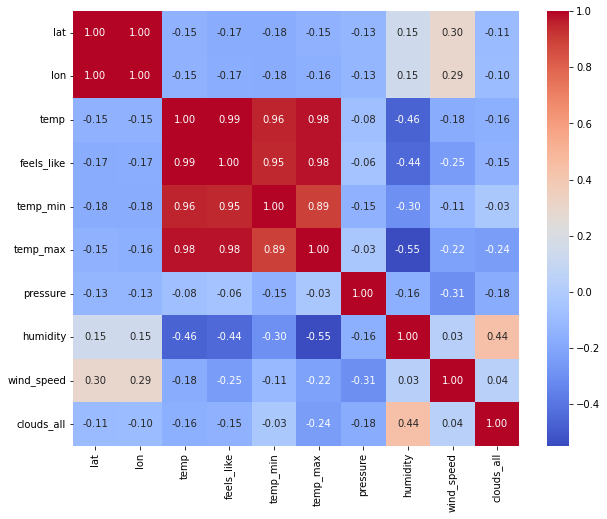

In [42]:
# ### Analiza korelacji między zmiennymi
# Badamy, jak zmienne są ze sobą powiązane, co może pomóc w identyfikacji kluczowych czynników wpływających na produkcję energii.

import seaborn as sns
import matplotlib.pyplot as plt

# Heatmapa korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(df_weather_db.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

1. **Silna korelacja między wskaźnikami temperatury**: Widoczna jest bardzo wysoka korelacja między temp, feels_like, temp_min i temp_max, co jest zrozumiałe, ponieważ wszystkie te zmienne odnoszą się do temperatury. Wskaźniki te prawdopodobnie odnoszą się do tych samych zjawisk termicznych każdego dnia, stąd ich wartości zmieniają się razem w podobny sposób.

2. **Niskie korelacje z szerokością i długością geograficzną**: Zmienne lat (szerokość geograficzna) i lon (długość geograficzna) mają niskie wartości korelacji z innymi zmiennymi. Oznacza to, że te konkretne lokalizacje geograficzne nie mają silnego bezpośredniego związku z mierzonymi parametrami pogodowymi. Może to jednak oznaczać, że lokalizacja nie była głównym czynnikiem różnic w tych danych, lub że dane obejmują niewielki zakres geograficzny, gdzie warunki pogodowe są dość jednolite.

3. **Korelacja między humidity (wilgotnością) a temperaturą**: Istnieje negatywna korelacja między wilgotnością a wskaźnikami temperatury, co może wskazywać, że w dni cieplejsze powietrze jest mniej wilgotne lub na odwrót, co jest zgodne z ogólną wiedzą meteorologiczną.

4. **Słaba korelacja clouds_all z innymi zmiennymi**: Zmienna clouds_all, która mierzy poziom zachmurzenia, nie wykazuje silnych korelacji z większością innych zmiennych, co sugeruje, że stopień zachmurzenia może być niezależny od innych mierzonych warunków, jak temperatura czy wilgotność. Dla produkcji energii słonecznej, ta zmienna może być szczególnie ważna, ponieważ duża ilość chmur zwykle zmniejsza ilość docierającego do paneli światła słonecznego.

5. **Pozostałe zależności**: Są one generalnie słabe lub umiarkowane, co wskazuje, że nie ma innych silnych bezpośrednich zależności między tymi zmiennymi w danych, które podałeś.

**Wnisoki**:Te informacje mogą być pomocne w decydowaniu, które zmienne uwzględnić w modelowaniu produkcji energii fotowoltaicznej. Na przykład, można skupić się na badaniu wpływu zachmurzenia i temperatury, ponieważ mogą one mieć największy wpływ na wydajność paneli fotowoltaicznych.

MOZE TRZEBA DLA KAZDEJ LOKALIZACJI Z OSOBNA ZROBIC WYKRESY?
*******************

In [45]:
# Sprawdzamy, jakie mamy unikalne lokalizacje w zbiorze danych
unique_locations = df_weather_db['city_name'].unique()
unique_locations

array(['Baden_Baden', 'Bozanska', 'Walcz_Drugi'], dtype=object)

TO SA WYKRESY DLA WSZYSTKICH LOKALIZACJI RAZEM

1. Histogramy pozwalające zobaczyć rozkład zmiennych, takich jak temperatura czy wilgotność.
2. Wykresy pudełkowe (boxploty) do identyfikacji potencjalnych obserwacji odstających.
3. Wykresy czasowe (time series plots) pokazujące, jak kluczowe zmienne zmieniają się w czasie.

In [ ]:
# Konwersja kolumny date na typ datetime i ustawienie jako indeks
df_weather_db['date'] = pd.to_datetime(df_weather_db['date'])
df_weather_db.set_index('date', inplace=True)

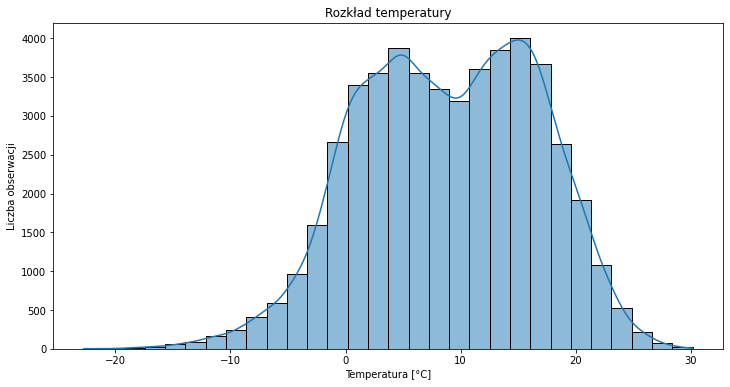

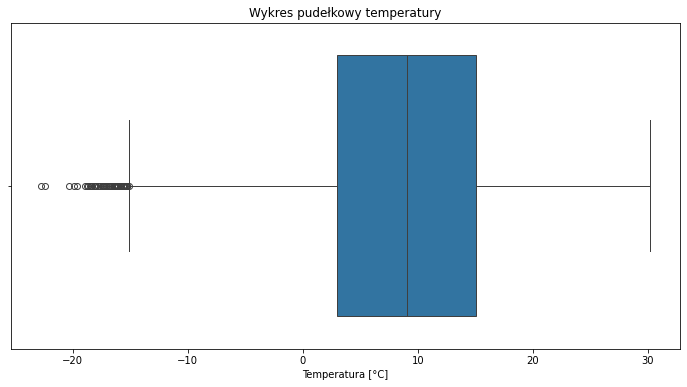

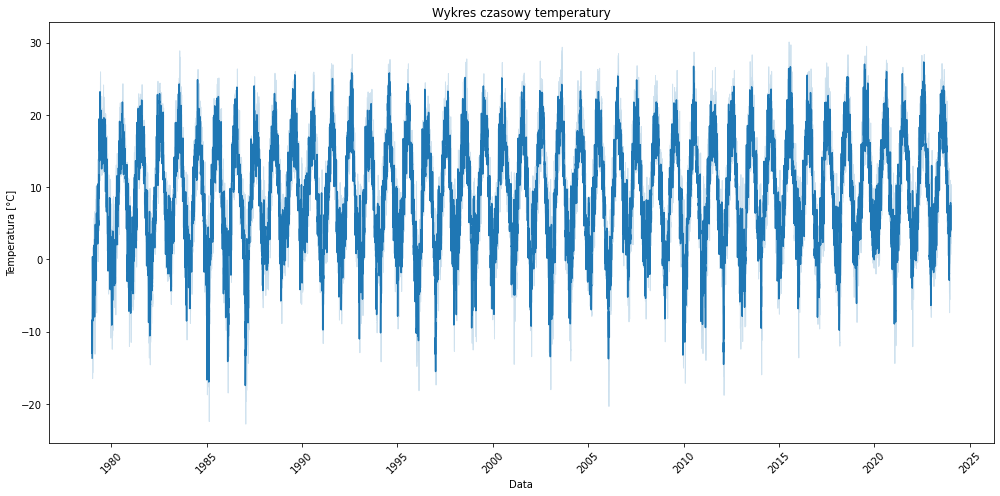

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# %%
# Histogramy dla wybranych zmiennych
plt.figure(figsize=(12, 6))
sns.histplot(df_weather_db['temp'], kde=True, bins=30)
plt.title('Rozkład temperatury')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Liczba obserwacji')
plt.show()

# %%
# Wykresy pudełkowe dla wybranych zmiennych
plt.figure(figsize=(12, 6))
sns.boxplot(x='temp', data=df_weather_db)
plt.title('Wykres pudełkowy temperatury')
plt.xlabel('Temperatura [°C]')
plt.show()

# %%
# Wykres czasowy dla wybranej zmiennej
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='temp', data=df_weather_db)
plt.title('Wykres czasowy temperatury')
plt.xlabel('Data')
plt.ylabel('Temperatura [°C]')
plt.xticks(rotation=45)
plt.tight_layout()  # Aby upewnić się, że etykiety nie są obcięte
plt.show()


**Z histogramu wynika, że**:

1. Rozkład temperatur jest mniej więcej symetryczny, sugerując rozkład zbliżony do normalnego w zakresie od około -20°C do 30°C.
2. Najczęściej występujące wartości temperatur to około 10°C, co może być średnią temperaturą dla analizowanej lokalizacji lub okresu.
3. Brak ekstremalnych temperatur: Nie widać wartości skrajnie wysokich lub niskich, co może wskazywać na brak danych dotyczących ekstremalnych warunków pogodowych lub na to, że dane pochodzą z umiarkowanego klimatu.
4. Potencjalne bimodalność: Histogram wydaje się mieć dwa szczyty, jeden w okolicy niższych temperatur, drugi w okolicy wyższych. Może to wskazywać na sezonowość w danych, gdzie mamy okresy cieplejsze i chłodniejsze.

**Z wykresu pudelkowgo wynika, że**:

1. Mediana w okolicy 10°C sugeruje, że większość dni w zbiorze danych ma umiarkowaną temperaturę, co może być korzystne dla efektywności pracy paneli.
2. Kwartyle: Dolny kwartyl znajduje się poniżej 0°C, a górny powyżej 10°C, co wskazuje, że połowa wszystkich wartości temperatur leży w tym zakresie.
3. Wąsy wykresu: Rozciągają się od najniższej do najwyższej wartości temperatury, które nie są uznane za odstające, i nie obejmują wartości ekstremalnych (outliers).
4. Obserwacje odstające: Wykres pokazuje kilka punktów odstających poniżej dolnego wąsa wykresu, które reprezentują bardzo niskie temperatury.

**Z szeregu czasowego wynika, że**:
1. Sezonowość: Wyraźnie widać wzorce sezonowych wahań temperatury, z wyższymi temperaturami w środku każdego roku i niższymi na początku i na końcu. To typowe dla klimatów umiarkowanych, gdzie różnice pomiędzy latem a zimą są znaczące.
2. Zmienność: Temperatura wykazuje dużą zmienność, co jest widoczne poprzez szeroki zakres temperatur w każdym sezonie.
3. Brak długoterminowego trendu wzrostowego lub spadkowego: Na pierwszy rzut oka nie widać długoterminowego trendu, który wskazywałby na stałe ocieplenie lub ochłodzenie klimatu w analizowanym okresie. Jednak do dokładniejszej analizy trendów potrzebna byłaby statystyczna analiza trendów, na przykład z wykorzystaniem regresji liniowej.
4. Brak ekstremów: Chociaż widać sezonowe wahania, nie ma oczywistych anomalii, takich jak niezwykle wysokie lub niskie temperatury, które odstają od typowego wzorca sezonowego.

tutaj zrobmy analize trendu dla temperatury

Analiza trendu niekoniecznie musi być równoznaczna z predykcją. Podczas gdy predykcja skupia się na prognozowaniu przyszłych wartości na podstawie wzorców z przeszłości, analiza trendu pozwala na zrozumienie ogólnego kierunku zmian w czasie, który miał miejsce w historycznych danych. Trend może być w górę (wskazując na wzrost), w dół (wskazując na spadek) lub może być płaski (bez zmian).

Analiza trendu za pomocą regresji liniowej to jedna z metod, która może ujawnić, czy istnieje znaczący długoterminowy wzrost lub spadek temperatury w ramach dostępnych danych. Nie przewiduje ona jednak przyszłości; pokazuje jedynie, czy w przeszłości było obserwowane statystycznie istotne zwiększenie lub zmniejszenie temperatury.

Chętnie przeprowadzę analizę trendu dla danych o temperaturze. Aby to zrobić, będę potrzebował dostępu do danych temperatury w postaci numerycznej, wraz z odpowiadającymi im datami. Jeśli przekażesz mi dane, mogę zastosować regresję liniową i wygenerować wykres, który pokaże trend w tych danych.

POZNIEJ ROBIMY WYKRESY I LINIE TRENDU DLA INNYCH CECH

WYBIERAMY TE KORE MOGA MIEC WPLYW NA NASZE PANELE I NA NICH BUDEUJEMY DODATKOWE KOLUMNY

****** to na koncu******

C:\Users\reszbart\AppData\Local\Temp/ipykernel_27716/1055016808.py:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


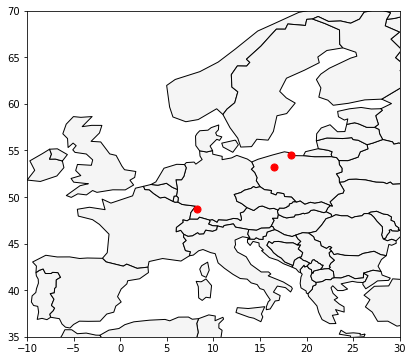

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Przykładowe dane, jeśli masz już szerokość i długość geograficzną:
data = {
    'City': ['Baden_Baden', 'Bozanska', 'Walcz_Drugi'],
    'Latitude': [48.765640, 54.473028, 53.257039],
    'Longitude': [8.228524, 18.302179, 16.521203]
}
df = pd.DataFrame(data)

# Konwersja danych DataFrame na GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Tworzenie mapy i skupienie na Europie
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Definiowanie granic dla mapy Europy
ax = world.plot(figsize=(10, 6), color='whitesmoke', edgecolor='black', linewidth=1)
gdf.plot(ax=ax, color='red', markersize=50)

# Ustawienie zakresu dla Europy
ax.set_xlim(-10, 30)  # Długość geograficzna od -10 do 30
ax.set_ylim(35, 70)  # Szerokość geograficzna od 35 do 70

plt.show()



moze tutaj zrobimy jeszcze raz wstepne sprawdzenia danych, jakie typy sa, ile jest pustych wartosci itp

tutaj moze jakies wstepne wykresy pokazujace zeby zobaczyc dane jak sie ksztaltowalo to:
- miejsce na mapie
- jak ksztaltuje sie pogoda na przestrzeni lat (temp, wiatr szybkosc, zachmurzenie, weather main)
- na podstawie tych danych mopodejmujemy kroki nizej, czyli zakaldamy prosta hipoteze na potrzeby proejktu zeby obliczyc oplacalnosc potrzebujemy naslonecznienia oraz temperatury
- uzupelniamy ramke tymi danymi, wyswietlamy wykresy dla nich.
- z przygotowanymi danymi mozemy przygotowac wizualizacje i dashboard 1 dla wartosci hsitorycznych (dashboard 2 bedzie predykcja)

Jeśli planujesz prezentację, która kompleksowo ilustruje wpływ różnych czynników na produkcję energii, lepiej podejść do tego zadania w sposób holistyczny od samego początku. Możemy połączyć analizę wpływu dni nasłonecznionych oraz temperatury na produkcję energii, uwzględniając oba te czynniki jednocześnie w obliczeniach. Dzięki temu uzyskasz bardziej precyzyjne i zintegrowane wyniki, które będą lepiej oddawały rzeczywiste warunki pracy paneli fotowoltaicznych.

Proponowane kroki:
Obliczenie potencjalnej produkcji energii dla każdej lokalizacji i każdego miesiąca, uwzględniając liczby dni nasłonecznionych oraz temperatury.
Korekta produkcji energii na podstawie temperatury: Wyższe temperatury mogą obniżać wydajność paneli, szczególnie w bardzo ciepłe dni. Ustalimy funkcję korekty wydajności na podstawie temperatury.

In [ ]:
# Krok 1: Oszacowanie dni nasłonecznionych

# Ustalamy kryteria dla dni nasłonecznionych
data['sunny_day'] = (data['clouds_all'] < 30) | (data['weather_main'] == 'Clear')

# Krok 2: Obliczanie przybliżonej produkcji energii dla przykładowej mocy instalacji 5 kWp

# Definiujemy stałe
installed_power_kWp = 5  # Moc zainstalowana w kWp
performance_ratio = 0.75  # Performance Ratio (współczynnik wydajności)
average_daily_sun_hours = 4  # Średnia liczba godzin słonecznych na dobę (ogólna wartość dla przykładu)

# Obliczamy roczną produkcję energii
# Liczba dni nasłonecznionych w roku
annual_sunny_days = data.groupby(data['date'].str[:4])['sunny_day'].sum()

# Roczna produkcja energii w kWh
annual_energy_production_kWh = annual_sunny_days * installed_power_kWp * average_daily_sun_hours * performance_ratio

# Przykładowe wyniki dla kilku lat
annual_energy_production_kWh.head()


KeyError: 'clouds_all'

In [ ]:
# Krok 1: Obliczenie miesięcznej produkcji energii z uwzględnieniem dni nasłonecznionych

# Obliczmy średnią temperaturę maksymalną w każdym miesiącu dla każdej lokalizacji
monthly_avg_max_temp = data.groupby(['city_name', 'year_month'])['temp_max'].mean().reset_index()

# Połączmy dane o dniach nasłonecznionych z danymi o temperaturze
monthly_data = monthly_sunny_days.merge(monthly_avg_max_temp, on=['city_name', 'year_month'])

# Definicja funkcji korekty wydajności na podstawie temperatury
def performance_correction(temp):
    # Przyjmujemy spadek wydajności o 0.5% na każdy stopień powyżej 25 stopni C
    if temp > 25:
        return 1 - (0.005 * (temp - 25))
    else:
        return 1

# Obliczamy miesięczną produkcję energii z korektą temperatury
monthly_data['performance_factor'] = monthly_data['temp_max'].apply(performance_correction)
monthly_data['monthly_energy_production_kWh'] = (
    monthly_data['sunny_day'] * installed_power_kWp * average_daily_sun_hours * performance_ratio *
    monthly_data['performance_factor']
)

# Pokażemy przykładowe wyniki
monthly_data[['city_name', 'year_month', 'sunny_day', 'temp_max', 'monthly_energy_production_kWh']].head()
